In [69]:
%load_ext autoreload
%autoreload 2

from model import LitS4Model
from data import LitDataModule
from plotting import make_bias, make_resolution
import torch
from torch.utils.data import DataLoader
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import tqdm
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
CHECKPOINT = 'runs/input_I_Q__output_carrierfreq_axialfreq__d_model_8_n_layers_4/lightning_logs/iw44cmsi/checkpoints/epoch=67-step=152184.ckpt'

In [61]:
model = LitS4Model.load_from_checkpoint(CHECKPOINT)
model = model.to(device)
model = model.eval()

In [62]:
#dataset = LitDataModule.load_from_checkpoint(CHECKPOINT, inputs=['output_ts_I'], variables=model.variables)
dataset = LitDataModule.load_from_checkpoint(CHECKPOINT)

In [63]:
true = []
pred = []

for ts,var in dataset.test_dataloader():
    with torch.no_grad():
        pred.append(model(ts.to(device)).cpu().numpy())
        true.append(var.numpy()) 

In [64]:
#true = np.concatenate(true)
#pred = np.concatenate(pred)

true = np.concatenate(true, axis=0)
pred = np.concatenate(pred, axis=0)

In [65]:
# undo the normalization
pred_post = pred * dataset.stds + dataset.mu
true_post = true * dataset.stds + dataset.mu

In [66]:
model.variables

['start_carrier_frequency_Hz', 'avg_axial_frequency_Hz']

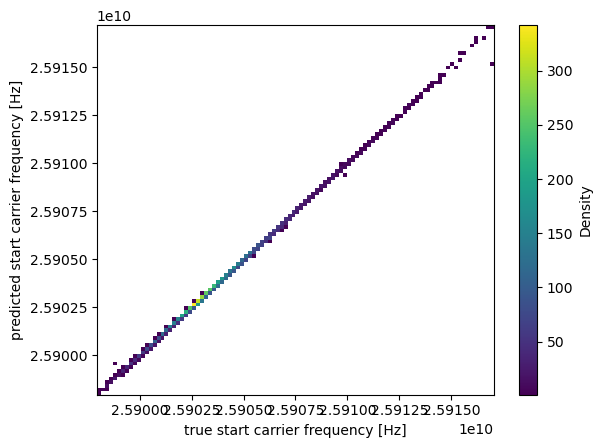

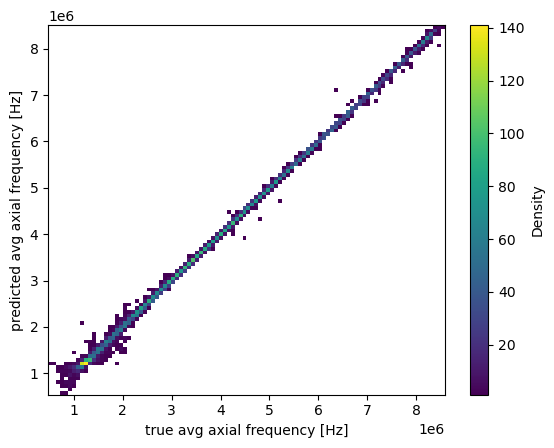

In [70]:
for idx, var in enumerate(model.variables):
    fig = make_bias(idx, var, true_post, pred_post)

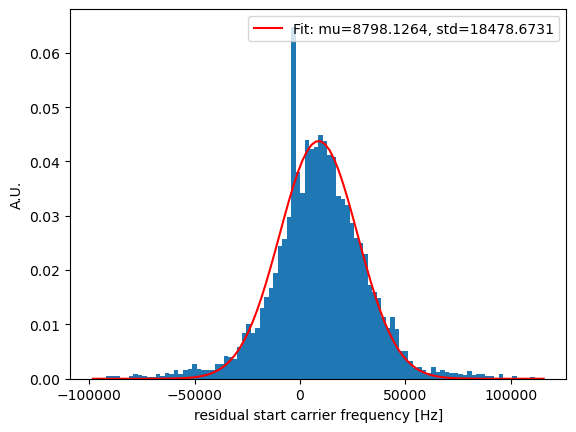

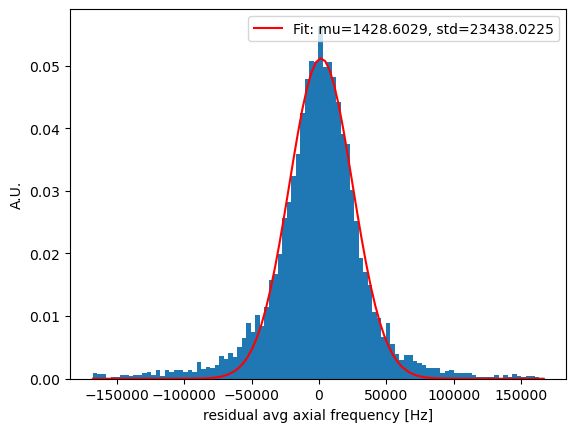

In [71]:
import matplotlib.pyplot as plt
for idx, var in enumerate(model.variables):
    fig = make_resolution(idx, var, true_post, pred_post)